In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
#load the data
data = pd.read_csv(r'C:\Users\USER\Desktop\internship\Assignment-1 Dataset.csv')

In [7]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [8]:
data.set_index('Timestamp', inplace=True)

In [30]:
data_resampled = data.resample('M').size()
data_resampled

Timestamp
2019-01-31     7
2019-02-28     4
2019-03-31     3
2019-04-30     7
2019-05-31    19
2019-06-30    25
2019-07-31    23
2019-08-31    27
2019-09-30    16
2019-10-31    17
2019-11-30    14
2019-12-31    16
2020-01-31    21
2020-02-29    22
2020-03-31    26
2020-04-30    26
2020-05-31    24
2020-06-30    23
2020-07-31    24
2020-08-31    23
2020-09-30    18
2020-10-31    26
2020-11-30    16
2020-12-31     9
2021-01-31    19
2021-02-28    13
2021-03-31    22
2021-04-30    11
2021-05-31    26
2021-06-30    21
2021-07-31    14
2021-08-31    15
2021-09-30    19
2021-10-31    14
2021-11-30    24
2021-12-31    17
2022-01-31    24
2022-02-28    20
2022-03-31    28
2022-04-30    17
2022-05-31    25
2022-06-30    26
2022-07-31    26
2022-08-31    23
2022-09-30    29
2022-10-31    29
2022-11-30    33
2022-12-31    22
2023-01-31    19
2023-02-28    11
2023-03-31     0
2023-04-30     1
2023-05-31     2
2023-06-30     3
2023-07-31     5
2023-08-31     0
2023-09-30     1
2023-10-31     2
2023

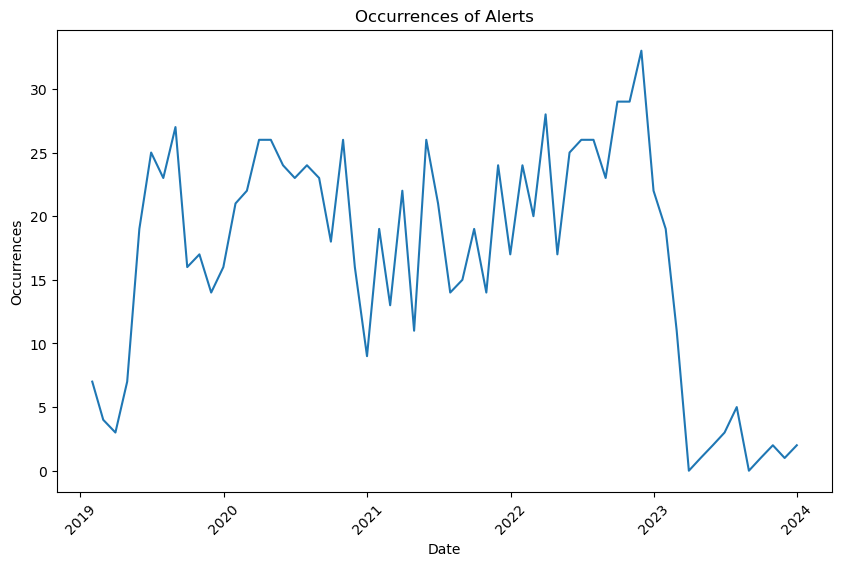

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data_resampled.index, data_resampled.values)
plt.xlabel('Date')
plt.ylabel('Occurrences')
plt.title('Occurrences of Alerts')
plt.xticks(rotation=45)
plt.show()

In [33]:
df_year = data.resample('Y').size()
df_year

Timestamp
2019-12-31    178
2020-12-31    258
2021-12-31    215
2022-12-31    302
2023-12-31     47
Freq: A-DEC, dtype: int64

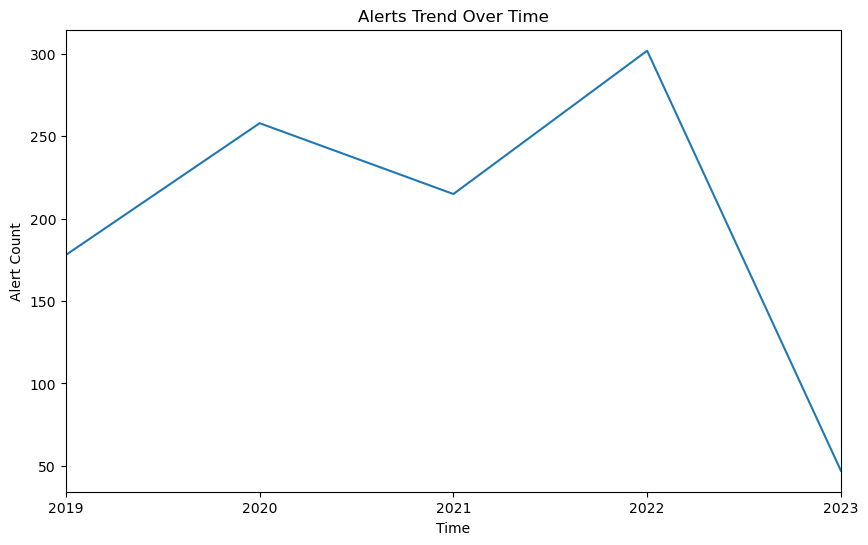

In [34]:
# Plot the trend over time
plt.figure(figsize=(10, 6))
df_year.plot()
plt.title('Alerts Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Alert Count')
plt.show()

In [35]:
df = data['Severity'].groupby(data.index.year).value_counts().unstack().fillna(0)
df

Severity,high,low,medium
Timestamp,,,
2019,66,60,52
2020,87,85,86
2021,74,72,69
2022,100,98,104
2023,20,15,12


In [36]:
df1 = data['Assigned To'].groupby(data.index.year).value_counts().unstack().fillna(0)
df1

Assigned To,Alice,Bob,David,Emily,Jane,John,Karen,Mike,Sara,Tom
Timestamp,,,,,,,,,,
2019,15,21,14,15,21,12,25,14,18,23
2020,20,20,29,21,30,30,22,34,26,26
2021,19,25,23,26,23,25,16,24,20,14
2022,29,36,28,33,36,24,24,36,29,27
2023,4,2,3,3,7,5,7,6,3,7


In [37]:
df2 = data['Alert Source'].groupby(data.index.year).value_counts().unstack().fillna(0)
df2

Alert Source,CPU,GPU,RAM,case,flash drive,hard drive,keyboard,modem,motherboard,power supply monitor,printer,router
Timestamp,,,,,,,,,,,,
2019,13,17,14,14,20,12,18,17,10,16,15,12
2020,22,27,22,17,14,25,23,21,18,19,26,24
2021,24,20,18,18,20,13,16,16,14,18,17,21
2022,24,26,21,25,26,20,26,22,20,35,28,29
2023,2,4,6,2,6,3,3,2,2,6,7,4


In [25]:
decomposition = seasonal_decompose(data_resampled, model='additive')

In [26]:
# Access the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

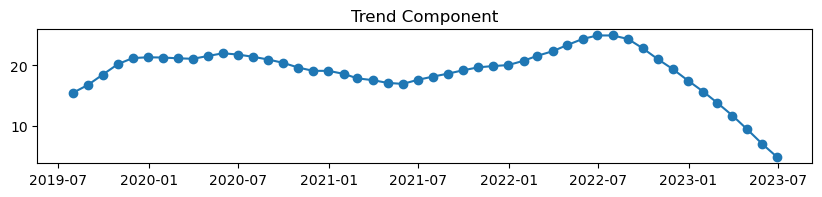

In [27]:
# Plot the decomposed components
plt.figure(figsize=(10, 8))

# Plot trend component
plt.subplot(411)
plt.plot(trend,marker='o')
plt.title('Trend Component')

# Show the plot
plt.show()

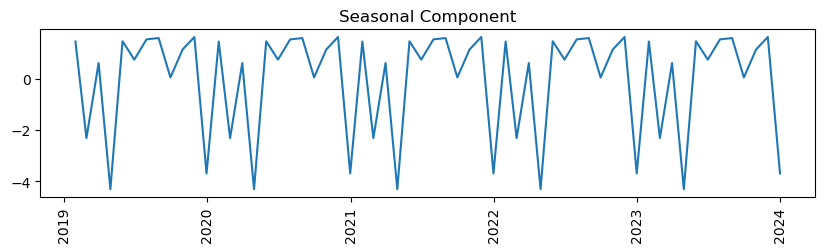

In [28]:
# Plot seasonal component
plt.figure(figsize=(10,10))
plt.subplot(412)
plt.plot(seasonal)
plt.title('Seasonal Component')
plt.xticks(rotation=90)
plt.show()

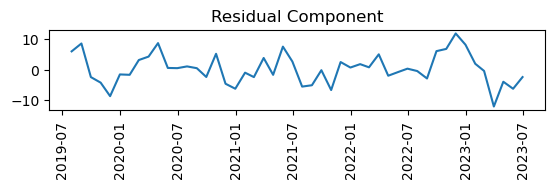

In [29]:
# Plot residual component
plt.subplot(413)
plt.plot(residual)
plt.title('Residual Component')
plt.xticks(rotation=90)
plt.show()